# Analysis of Electrical Grid Stability Simulated Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Import the Data_for_UCL_named.csv file
data = pd.read_csv('Data_for_UCI_named.csv')

data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
# Perform exploratory data analysis
# Check the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (10000, 14)


In [4]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64


In [5]:
# Check the data types of each column
print("Data types:\n", data.dtypes)

Data types:
 tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object


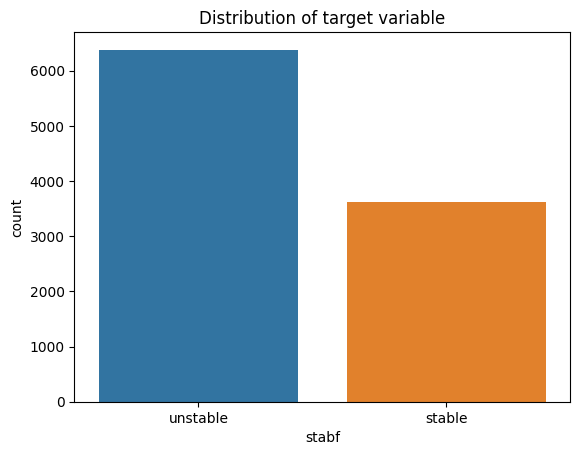

In [6]:
# Check the distribution of the target variable
sns.countplot(x='stabf', data=data)
plt.title("Distribution of target variable")
plt.show()

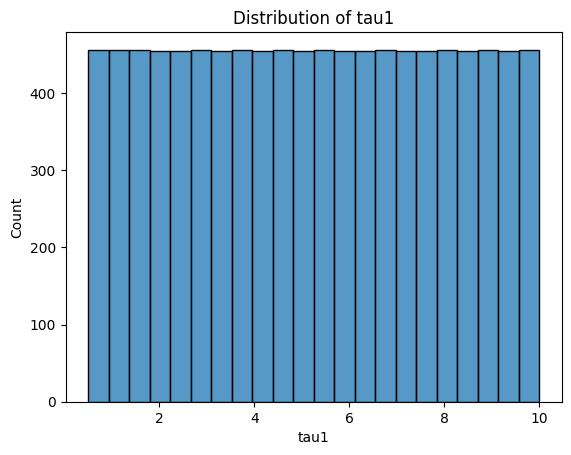

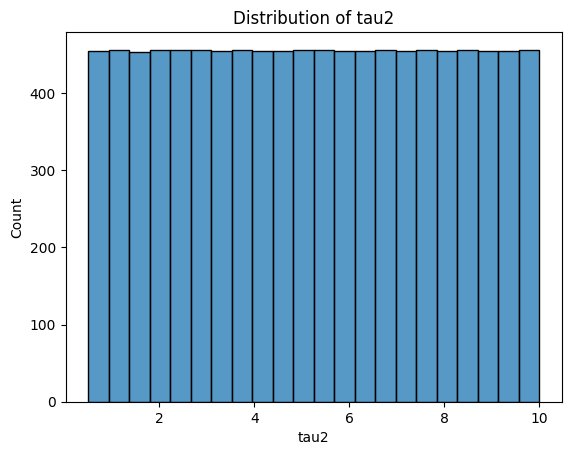

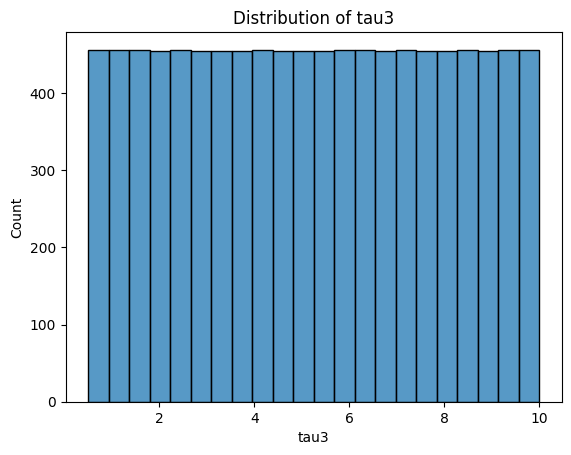

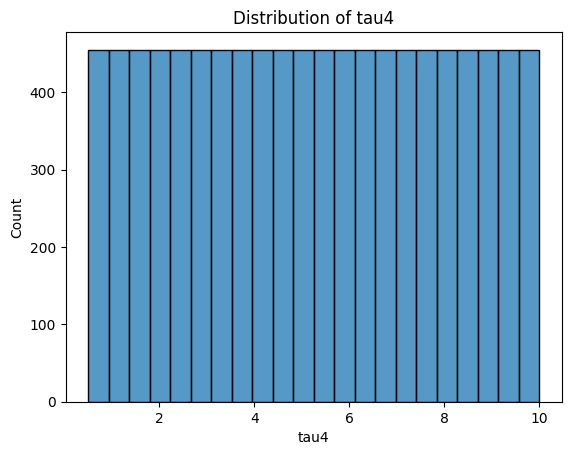

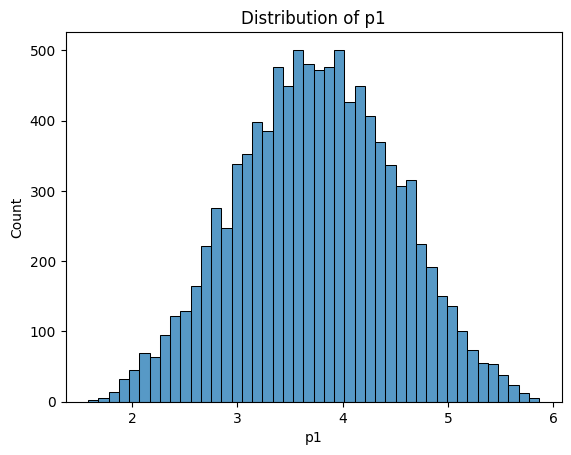

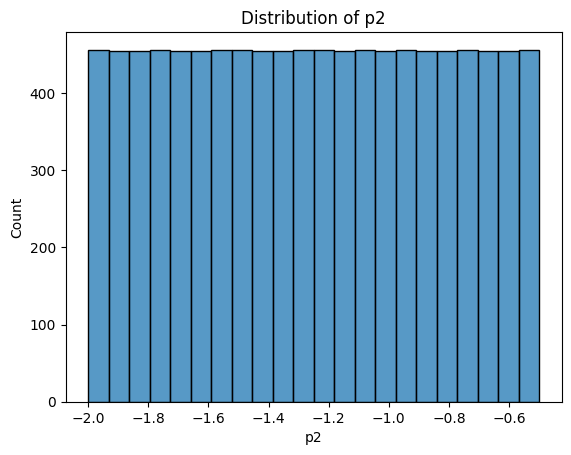

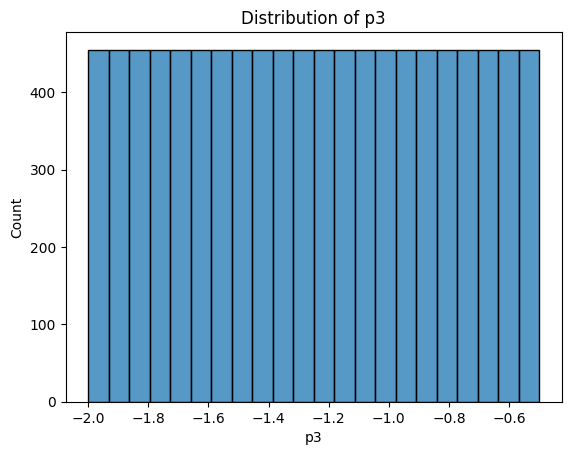

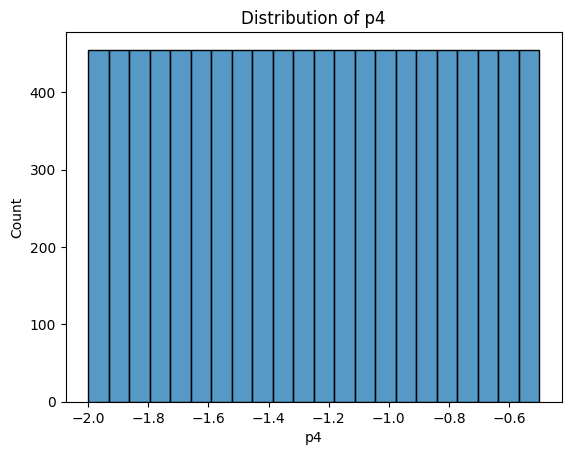

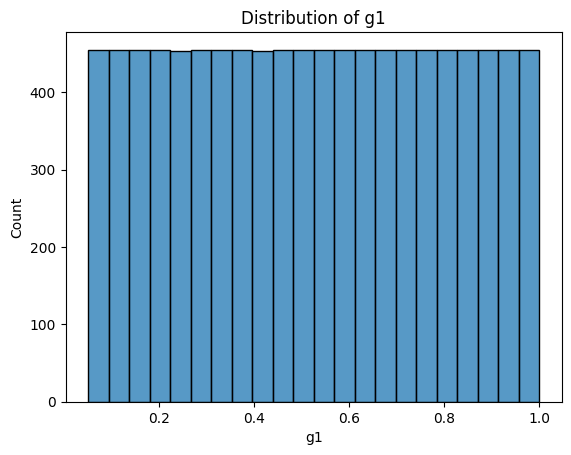

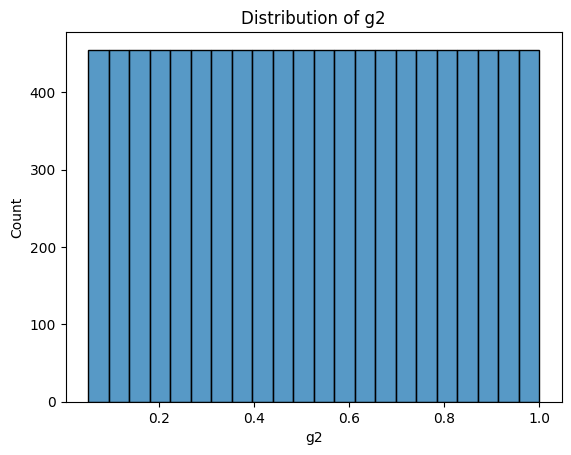

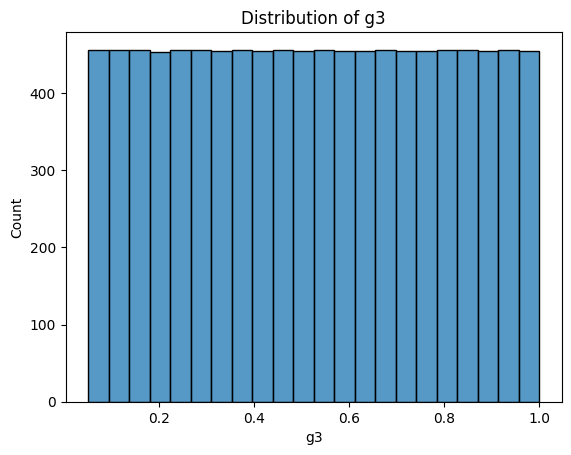

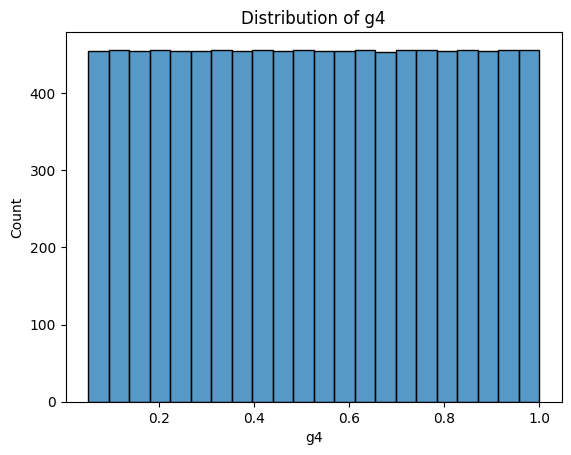

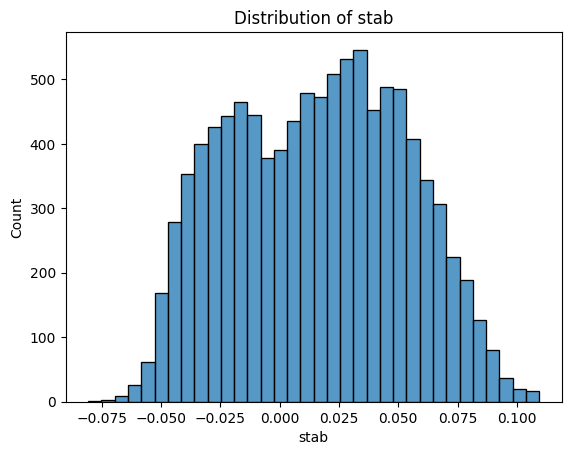

In [7]:
# Plot the distribution of each feature
for column in data.columns:
    if column != 'stabf':
        sns.histplot(data[column])
        plt.title(f"Distribution of {column}")
        plt.show()

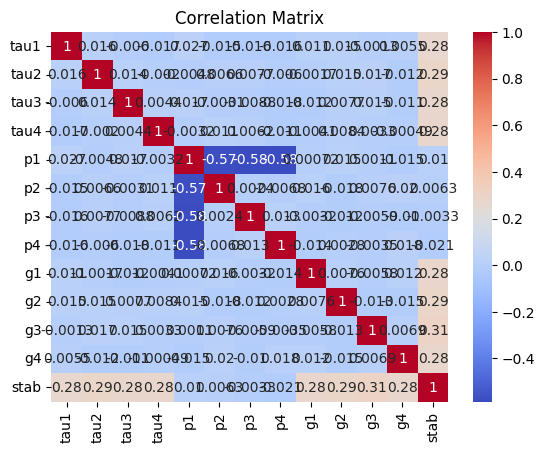

In [8]:
# Plot the correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
# Split the dataset into features and target variable
X = data.drop(columns=['stab', 'stabf'])
y = data['stabf']


# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Train a classification model

# Create an instance of the RandomForestClassifier
model = RandomForestClassifier()

# Train the model using the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Calculate the accuracy on the test set using the random forest classifier
accuracy = model.score(X_test, y_test)

# Round the accuracy to 4 decimal places
accuracy = round(accuracy, 4)

accuracy

0.91

In [13]:
# Train a classification model using XGBoost

# Create an instance of the XGBClassifier
model = XGBClassifier()

# Convert the target variable to numerical values
y_train = np.where(y_train == 'stable', 0, 1)
y_test = np.where(y_test == 'stable', 0, 1)

# Train the model using the training data
model.fit(X_train, y_train)

# Calculate the accuracy on the test set using the XGBoost classifier
accuracy = model.score(X_test, y_test)

# Round the accuracy to 4 decimal places
accuracy = round(accuracy, 4)

accuracy

0.939

In [14]:
# Train a classification model using LGBM

# Create an instance of the LGBMClassifier
model = LGBMClassifier()

# Train the model using the training data
model.fit(X_train, y_train)

# Calculate the accuracy on the test set using the LGBM classifier
accuracy = model.score(X_test, y_test)

# Round the accuracy to 4 decimal places
accuracy = round(accuracy, 4)

accuracy

0.937

In [15]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [4,6,8],
    'max_features': ['auto', 'log2', 'None']
}

# Create an instance of the ExtraTreesClassifier
estimator = ExtraTreesClassifier(random_state=1)

# Create an instance of the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator, param_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state=1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the RandomizedSearchCV
best_params = random_search.best_params_

best_params

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'log2'}

In [16]:
random_search.score(X_test,y_test)

0.9195

In [17]:
# Create an instance of the ExtraTreesClassifier with the best hyperparameters
model_optimal = ExtraTreesClassifier(n_estimators=best_params['n_estimators'], 
                                     min_samples_split=best_params['min_samples_split'], 
                                     min_samples_leaf=best_params['min_samples_leaf'], 
                                     max_features=best_params['max_features'], 
                                     random_state=1)

# Train the model using the training data
model_optimal.fit(X_train, y_train)

# Calculate the accuracy on the test set using the optimal model
accuracy_optimal = model_optimal.score(X_test, y_test)

# Round the accuracy to 4 decimal places
accuracy_optimal = round(accuracy_optimal, 4)

accuracy_optimal

0.9195

In [18]:
# Get the feature importances from the optimal ExtraTreesClassifier model
importance = model_optimal.feature_importances_

# Create a dictionary to store the feature importances with their corresponding column names
feature_importances = dict(zip(X_train.columns, importance))

# Sort the feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get the most and least important features
most_important = sorted_importances[0][0]
least_important = sorted_importances[-1][0]

most_important, least_important

('tau2', 'p1')